In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

## Загрузка изображения

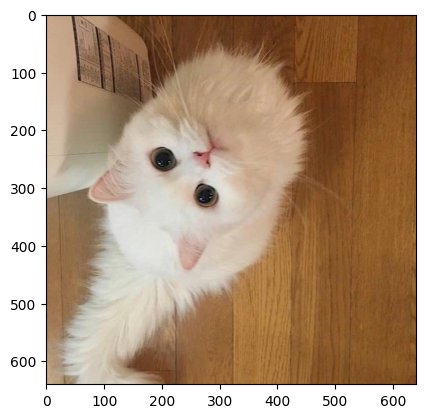

In [3]:
cat = cv2.imread('cat.jpg')
cat = cv2.cvtColor(cat, cv2.COLOR_BGR2RGB)
plt.imshow(cat)

### 1. orb features

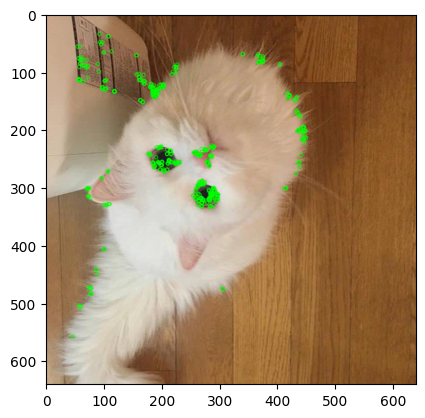

(<matplotlib.image.AxesImage at 0x23b896853d0>, None)

In [4]:
orb = cv2.ORB_create()
kp = orb.detect(cat,None)
kp, des = orb.compute(cat, kp)
cat2 = cv2.drawKeypoints(cat, kp, None, color=(0,255,0), flags=0)
plt.imshow(cat2), plt.show()

### 2. sift features

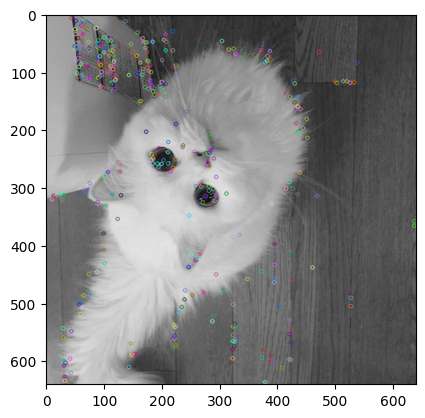

(<matplotlib.image.AxesImage at 0x23b8968b310>, None)

In [5]:
sift = cv2.SIFT_create()
gray= cv2.cvtColor(cat, cv2.COLOR_BGR2GRAY)
kp = sift.detect(gray, None)
сat3 = cv2.drawKeypoints(gray, kp, cat)
plt.imshow(сat3), plt.show()

### 3. canny edges

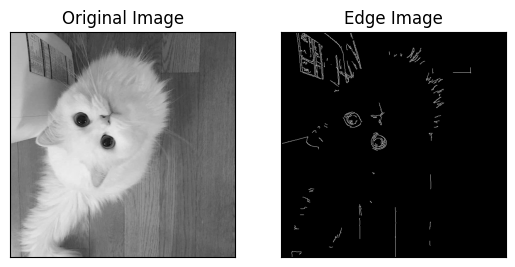

In [6]:
cat4 = cv2.imread('cat.jpg', cv2.IMREAD_GRAYSCALE)
edges = cv2.Canny(cat4, 100, 200)
 
plt.subplot(121), plt.imshow(cat4, cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

### 4. grayscale

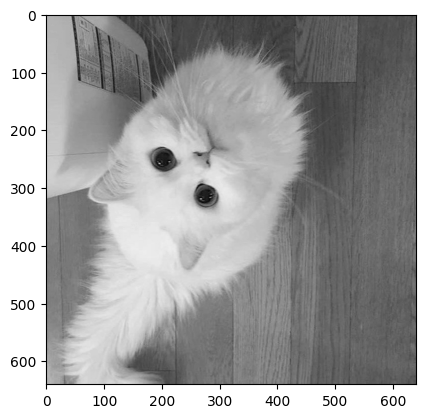

In [7]:
cat5 = cv2.imread('cat.jpg', cv2.IMREAD_GRAYSCALE)
plt.imshow(cat5, cmap='gray')

### 5. hsv

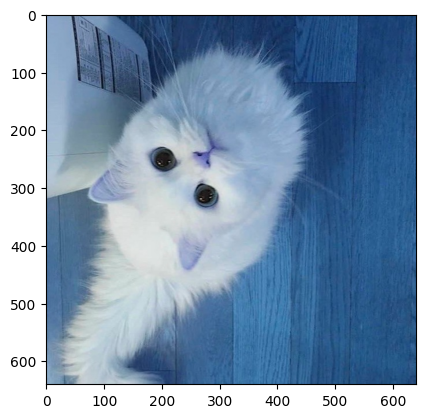

In [8]:
cat6 = cv2.imread('cat.jpg')
hsv = cv2.cvtColor(cat6, cv2.COLOR_BGR2HSV)
plt.imshow(cat6)

### 6. Horisontal flip

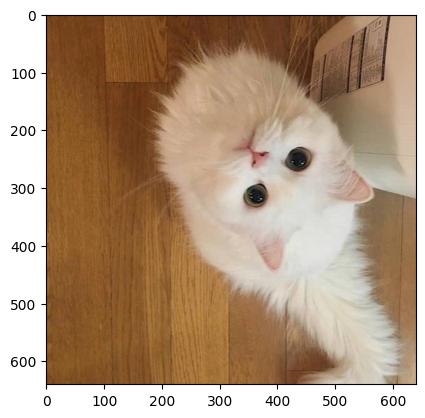

In [9]:
cat = cv2.imread('cat.jpg')
cat = cv2.cvtColor(cat, cv2.COLOR_BGR2RGB)
cat7 = cv2.flip(cat, 1)
plt.imshow(cat7)

### 7. Vertical flip

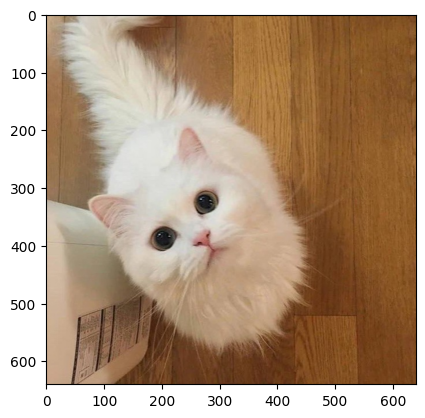

In [10]:
cat = cv2.imread('cat.jpg')
cat = cv2.cvtColor(cat, cv2.COLOR_BGR2RGB)
cat8 = cv2.flip(cat, 0)
plt.imshow(cat8)

### 8. 45 degrees

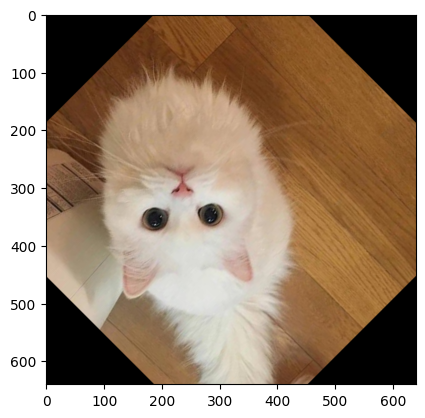

In [11]:
(height, width) = cat.shape[:2]
center = (width / 2, height / 2)
angle = 45
scale = 1.0
matrix = cv2.getRotationMatrix2D(center, angle, scale)
cat9 = cv2.warpAffine(cat, matrix, (width, height))
plt.imshow(cat9)

### 9. rotate image around specific point 30 degrees

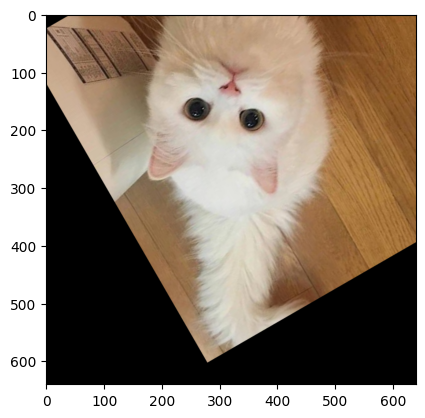

In [12]:
angle = 30
center = (70, 100)
(h, w) = cat.shape[:2]

M = cv2.getRotationMatrix2D(center, angle, scale)
cat10 = cv2.warpAffine(cat, M, (w, h))

plt.imshow(cat10)

### 10. Move the image 10 pixels to the right

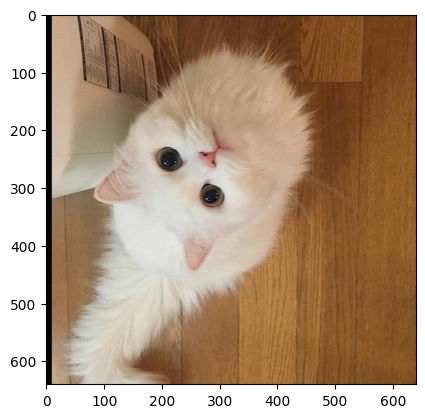

In [13]:
shift_matrix = np.float32([[1, 0, 10], [0, 1, 0]])
cat11 = cv2.warpAffine(cat, shift_matrix, (width, height))
plt.imshow(cat11)

### 11. increase brightness

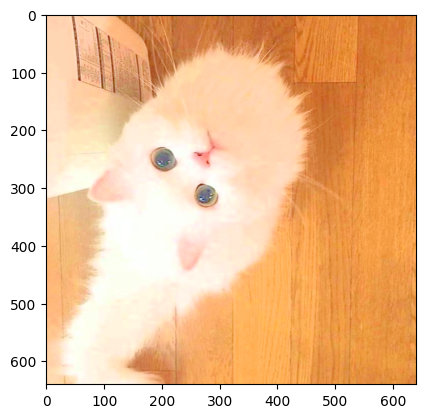

In [14]:
def increase_brightness(img, value=30):
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    h, s, v = cv2.split(hsv)

    lim = 255 - value
    v[v > lim] = 255
    v[v <= lim] += value

    final_hsv = cv2.merge((h, s, v))
    img = cv2.cvtColor(final_hsv, cv2.COLOR_HSV2BGR)
    return img

cat12 = increase_brightness(cat, value=100)
plt.imshow(cat12)

### 12. increase contrast

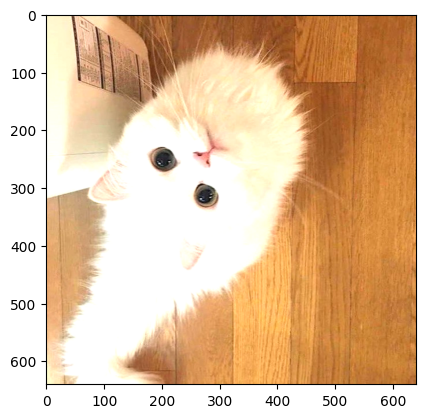

In [15]:
alpha = 1.5
beta = 0
cat13 = cv2.addWeighted(cat, alpha, np.zeros(cat.shape, cat.dtype), 0, beta)
plt.imshow(cat13)

### 13. gamma-transformation

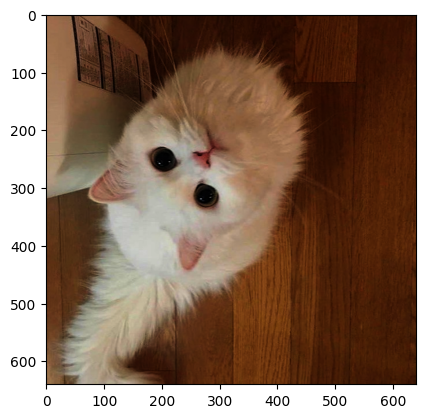

In [16]:
def adjust_gamma(image, gamma=1.0):
	invGamma = 1.0 / gamma
	table = np.array([((i / 255.0) ** invGamma) * 255
		for i in np.arange(0, 256)]).astype("uint8")
	return cv2.LUT(image, table)

cat14 = adjust_gamma(cat, 0.5)
plt.imshow(cat14)

### 14. histogram equalization

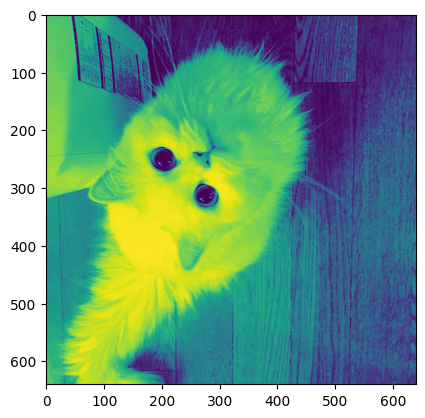

In [17]:
cat15 = cv2.cvtColor(cat, cv2.COLOR_BGR2GRAY)
dst = cv2.equalizeHist(cat15)
plt.imshow(dst)

### 15. white balance warm

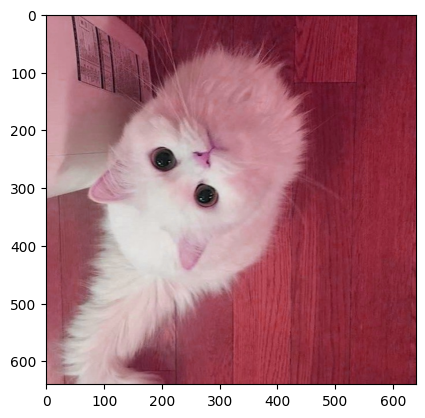

In [40]:
hsv_image = cv2.cvtColor(cat, cv2.COLOR_BGR2HSV)
hsv_image[:, :, 0] += 20  
warm_image = cv2.cvtColor(hsv_image, cv2.COLOR_HSV2BGR)
plt.imshow(warm_image)

### 16. white balance cold

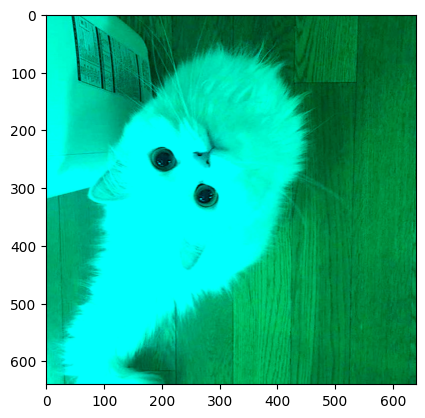

In [39]:
blue, green, red = cv2.split(cat)
k_blue = 0 
k_green = 1.5
k_red = 1.5

blue_corrected = cv2.convertScaleAbs(blue, alpha=k_blue, beta=0)
green_corrected = cv2.convertScaleAbs(green, alpha=k_green, beta=0)
red_corrected = cv2.convertScaleAbs(red, alpha=k_red, beta=0)

balanced_image = cv2.merge((blue_corrected, green_corrected, red_corrected))

plt.imshow(balanced_image)

### 17. image binarization

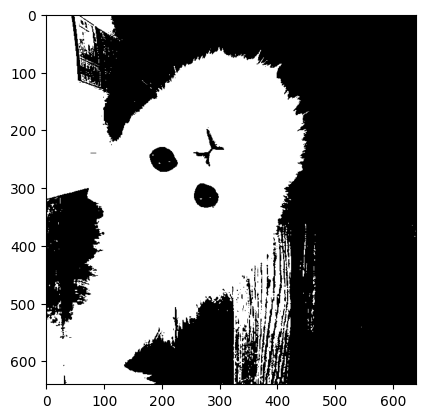

In [42]:
_, thresh_cat = cv2.threshold(cat4, 127, 255, cv2.THRESH_BINARY)
plt.imshow(thresh_cat, cmap='gray')

### 18. contours

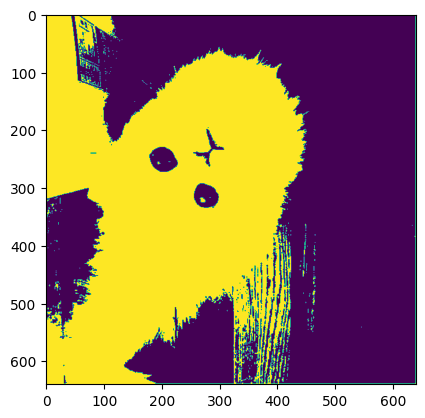

In [55]:
hsv_min = np.array((2, 28, 65), np.uint8)
hsv_max = np.array((26, 238, 255), np.uint8)
hsv = cv2.cvtColor(cat, cv2.COLOR_BGR2HSV ) 
thresh = cv2.inRange(hsv, hsv_min, hsv_max)
contours, hierarchy = cv2.findContours(thresh.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cat19 = cv2.drawContours(thresh_cat, contours, -1, (255,0,0), 3, cv2.LINE_AA, hierarchy, 1 )
plt.imshow(cat19) 

### 19. sobel

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


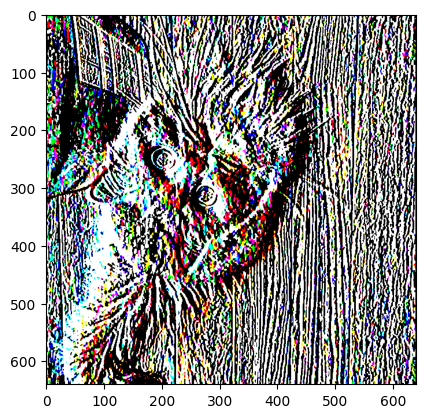

In [56]:
sobel_x = cv2.Sobel(cat, cv2.CV_64F, 1, 0, ksize=5)
plt.imshow(sobel_x)

### 20. laplas

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


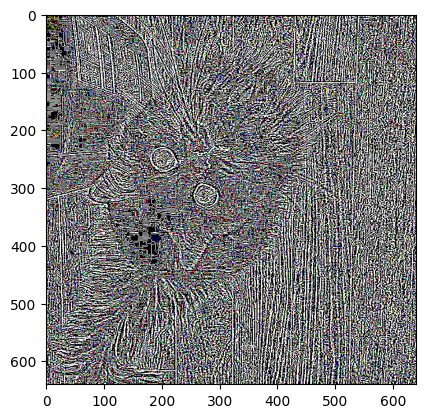

In [57]:
laplacian = cv2.Laplacian(cat, cv2.CV_64F)
plt.imshow(laplacian)

### 21. blur

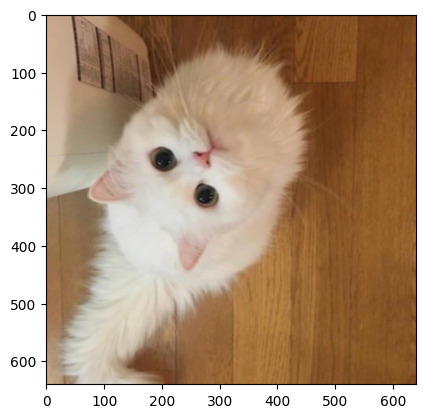

In [61]:
blurred_img = cv2.GaussianBlur(cat, (5, 5), 0)
plt.imshow(blurred_img)

### 22.  Apply erosion operation to the image

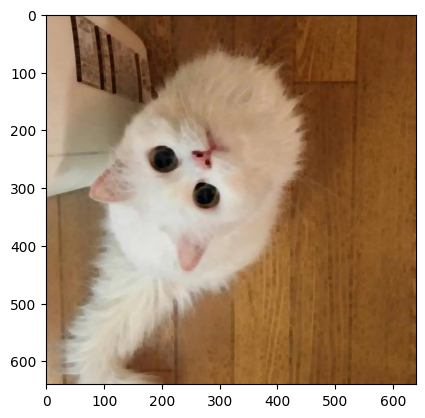

In [64]:
erosion = cv2.erode(cat, np.ones((5, 5), np.uint8), iterations=1)
plt.imshow(erosion)

### 23.  Apply dilation operation to the image

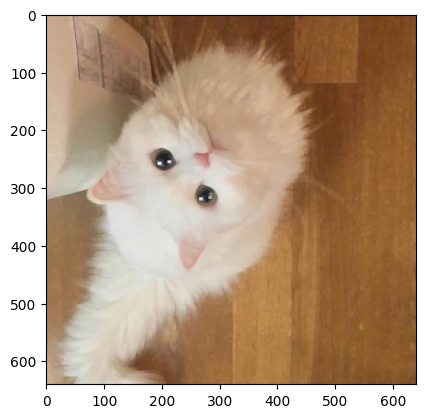

In [67]:
dilation = cv2.dilate(cat, np.ones((5, 5), np.uint8), iterations=1)
plt.imshow(dilation)